We begin by loading in and inspecting the dataset

In [67]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [68]:
# Load the dataset
df = pd.read_csv('Dataset_3.csv')


Impute the 0's


In [69]:
import os


df = df.replace(0, pd.NA)

for column in df.select_dtypes(include='object'):
    df[column].fillna(df[column].mode()[0], inplace=True)

output_file = 'imputed_file.csv'

if not os.path.exists(output_file):
    df.to_csv(output_file, index=False)
else:
    print("File already exists. Skipping writing to CSV.")

df = pd.read_csv(output_file)


File already exists. Skipping writing to CSV.


C:\Users\abdul\AppData\Local\Temp\ipykernel_27060\2928465858.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)
C:\Users\abdul\AppData\Local\Temp\ipykernel_27060\2928465858.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column].fillna(df[column].mod

In [70]:

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Display the columns of the dataset
print("\nColumns of the dataset:")
print(df.columns)

First few rows of the dataset:
   Unnamed: 0     area    perimeter  physiological_length  \
0           1  30725.5  2211.124012                   256   
1           1  65025.0  1020.000000                   256   
2           2  65025.0  1020.000000                   256   
3           3  65025.0  1020.000000                   256   
4           4  65025.0  1020.000000                   256   

   physiological_width  aspect_ratio  rectangularity  circularity  major_axis  \
0                  256           1.0        0.468834     0.078974         256   
1                  256           1.0        0.992203     0.785398         256   
2                  256           1.0        0.992203     0.785398         256   
3                  256           1.0        0.992203     0.785398         256   
4                  256           1.0        0.992203     0.785398         256   

   minor_axis  ...     mean_g     mean_b   stddev_r   stddev_g   stddev_b  \
0         256  ...  36.040314  24.8130

In [71]:
#Remove unnecessary column
df.drop('Unnamed: 0', axis=1, inplace=True)

In [72]:
# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())


Missing values in the dataset:
area                          0
perimeter                     0
physiological_length          0
physiological_width           0
aspect_ratio                  0
rectangularity                0
circularity                   0
major_axis                    0
minor_axis                    0
convex_area                   0
convex_ratio                  0
mean_r                        0
mean_g                        0
mean_b                        0
stddev_r                      0
stddev_g                      0
stddev_b                      0
contrast                      0
correlation                   0
inverse_difference_moments    0
entropy                       0
classlabel                    0
dtype: int64


In [73]:
'''df = pd.read_csv('imputed_file.csv')
# Print unique categories in the 'classlabel' column
unique_categories = df['classlabel'].unique()
print("Unique categories in the 'classlabel' column:")
for category in unique_categories:
    print(category)'''

'df = pd.read_csv(\'imputed_file.csv\')\n# Print unique categories in the \'classlabel\' column\nunique_categories = df[\'classlabel\'].unique()\nprint("Unique categories in the \'classlabel\' column:")\nfor category in unique_categories:\n    print(category)'

In [74]:
# Normalize numerical features
scaler = StandardScaler()
numerical_cols = ['area', 'perimeter', 'physiological_length', 'physiological_width', 'aspect_ratio', 'rectangularity', 'circularity', 'major_axis', 'minor_axis', 'convex_area', 'convex_ratio', 'mean_r', 'mean_g', 'mean_b', 'stddev_r', 'stddev_g', 'stddev_b', 'contrast', 'correlation', 'inverse_difference_moments', 'entropy']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


We can attempt to run the RandomForest CLassifier now, considering our data is clean. We will one-hot encode the ClassLabel column however.

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

In [76]:
# Splitting the data into features (X) and target variable (y)
X = df.drop('classlabel', axis=1)
y = df['classlabel']

# Applying one-hot encoding to the categorical target variable
y_encoded = pd.get_dummies(y)

In [77]:
# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [78]:
# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predicting the class labels for the test set
y_pred = rf_classifier.predict(X_test)

# Calculate metrics
accuracy_rfc = accuracy_score(y_test.values.argmax(axis=1), y_pred.argmax(axis=1))
precision_rfc = precision_score(y_test.values.argmax(axis=1), y_pred.argmax(axis=1), average='weighted')
recall_rfc = recall_score(y_test.values.argmax(axis=1), y_pred.argmax(axis=1), average='weighted')
f1_rfc = f1_score(y_test.values.argmax(axis=1), y_pred.argmax(axis=1), average='weighted')

# Print metrics
print("Accuracy:", accuracy_rfc)
print("Precision:", precision_rfc)
print("Recall:", recall_rfc)
print("F1 Score:", f1_rfc)

# Model evaluation
print("Classification Report:")
print(classification_report(y_test.values.argmax(axis=1), y_pred.argmax(axis=1), target_names=y_encoded.columns))

Accuracy: 0.4351851851851852
Precision: 0.6677938439442558
Recall: 0.4351851851851852
F1 Score: 0.45814600146121776
Classification Report:
                  precision    recall  f1-score   support

  Bacterial_spot       0.18      0.89      0.30        62
    early_blight       0.50      0.06      0.11        66
     late_blight       0.88      0.35      0.51        62
       leaf_mold       0.76      0.37      0.49        60
    mosaic_virus       0.82      0.67      0.74        55
   septoria_leaf       0.59      0.21      0.31        48
     spider_mite       0.72      0.32      0.45        65
     target_spot       0.76      0.61      0.67        56
yellow_leaf_curl       0.81      0.45      0.58        66

        accuracy                           0.44       540
       macro avg       0.67      0.44      0.46       540
    weighted avg       0.67      0.44      0.46       540



In [79]:
# Initialize and train the K-Nearest Neighbors classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

# Predicting the class labels for the test set
y_pred_knn = knn_classifier.predict(X_test)

# Calculate metrics for KNN
accuracy_knn = accuracy_score(y_test.values.argmax(axis=1), y_pred_knn.argmax(axis=1))
precision_knn = precision_score(y_test.values.argmax(axis=1), y_pred_knn.argmax(axis=1), average='weighted')
recall_knn = recall_score(y_test.values.argmax(axis=1), y_pred_knn.argmax(axis=1), average='weighted')
f1_knn = f1_score(y_test.values.argmax(axis=1), y_pred_knn.argmax(axis=1), average='weighted')

# Print metrics for KNN
print("K-Nearest Neighbors Metrics:")
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1 Score:", f1_knn)

# Detailed classification report for Logistic Regression
print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test.values.argmax(axis=1), y_pred_knn.argmax(axis=1), target_names=y_encoded.columns))

K-Nearest Neighbors Metrics:
Accuracy: 0.49444444444444446
Precision: 0.602763407786681
Recall: 0.49444444444444446
F1 Score: 0.4976286119004548

Classification Report for Logistic Regression:
                  precision    recall  f1-score   support

  Bacterial_spot       0.25      0.85      0.38        62
    early_blight       0.50      0.11      0.17        66
     late_blight       0.69      0.40      0.51        62
       leaf_mold       0.49      0.50      0.50        60
    mosaic_virus       0.82      0.76      0.79        55
   septoria_leaf       0.62      0.31      0.42        48
     spider_mite       0.57      0.37      0.45        65
     target_spot       0.64      0.62      0.63        56
yellow_leaf_curl       0.86      0.55      0.67        66

        accuracy                           0.49       540
       macro avg       0.61      0.50      0.50       540
    weighted avg       0.60      0.49      0.50       540



In [80]:

# Initialize and train the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predicting the class labels for the test set
y_pred_dt = dt_classifier.predict(X_test)

# Calculate metrics for Decision Tree
accuracy_dt = accuracy_score(y_test.values.argmax(axis=1), y_pred_dt.argmax(axis=1))
precision_dt = precision_score(y_test.values.argmax(axis=1), y_pred_dt.argmax(axis=1), average='weighted')
recall_dt = recall_score(y_test.values.argmax(axis=1), y_pred_dt.argmax(axis=1), average='weighted')
f1_dt = f1_score(y_test.values.argmax(axis=1), y_pred_dt.argmax(axis=1), average='weighted')

# Print metrics for Decision Tree
print("Decision Tree Metrics:")
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1 Score:", f1_dt)

# Detailed classification report for Logistic Regression
print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test.values.argmax(axis=1), y_pred_dt.argmax(axis=1), target_names=y_encoded.columns))

Decision Tree Metrics:
Accuracy: 0.4925925925925926
Precision: 0.4984477798910072
Recall: 0.4925925925925926
F1 Score: 0.49416255297496026

Classification Report for Logistic Regression:
                  precision    recall  f1-score   support

  Bacterial_spot       0.71      0.66      0.68        62
    early_blight       0.29      0.32      0.30        66
     late_blight       0.45      0.47      0.46        62
       leaf_mold       0.45      0.50      0.47        60
    mosaic_virus       0.70      0.64      0.67        55
   septoria_leaf       0.47      0.35      0.40        48
     spider_mite       0.44      0.43      0.44        65
     target_spot       0.48      0.52      0.50        56
yellow_leaf_curl       0.52      0.55      0.53        66

        accuracy                           0.49       540
       macro avg       0.50      0.49      0.50       540
    weighted avg       0.50      0.49      0.49       540



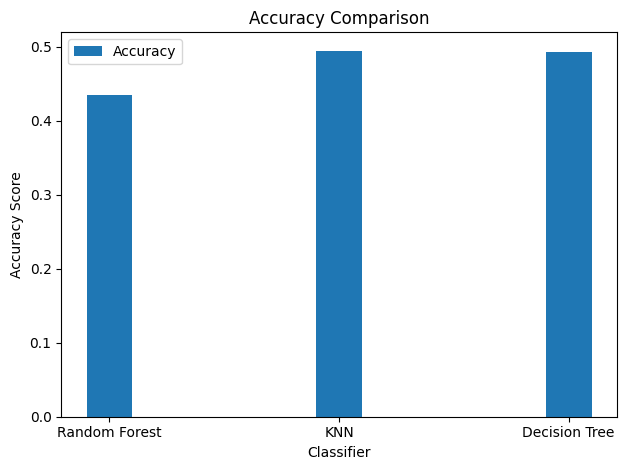

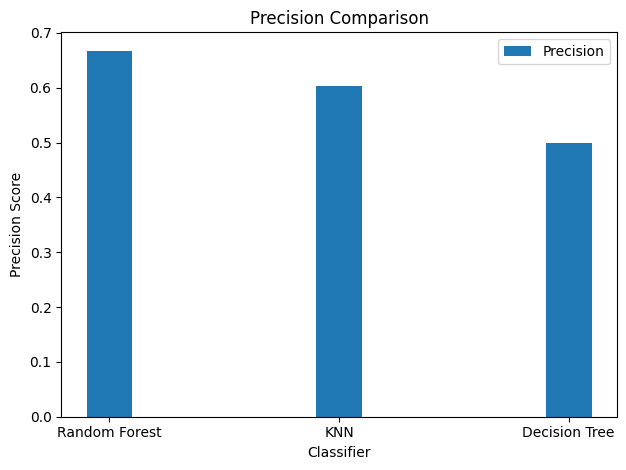

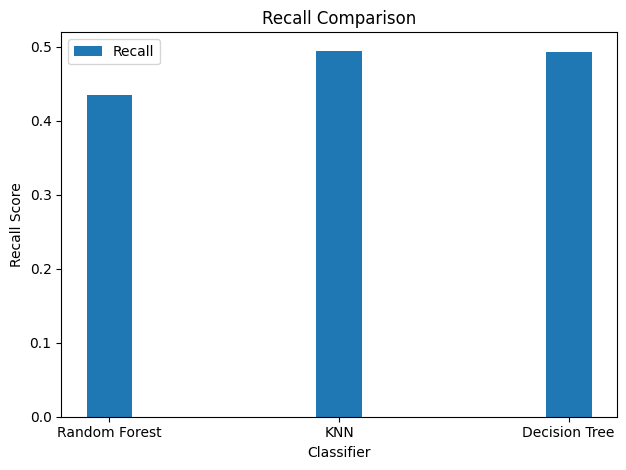

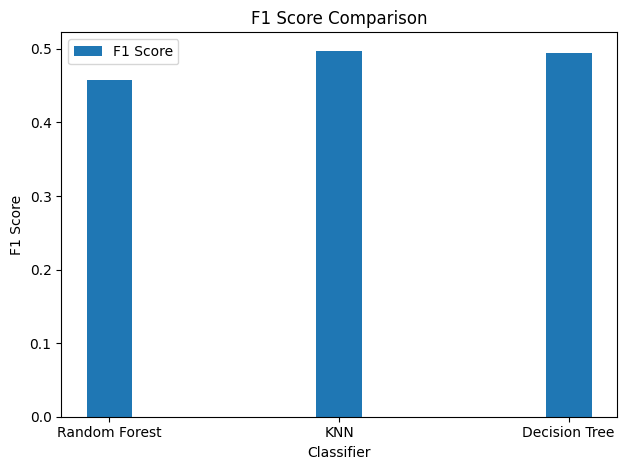

In [81]:
# Store the metrics in lists
classifiers = ['Random Forest', 'KNN', 'Decision Tree']
accuracy_scores = [accuracy_rfc, accuracy_knn, accuracy_dt]
precision_scores = [precision_rfc, precision_knn, precision_dt]
recall_scores = [recall_rfc, recall_knn, recall_dt]
f1_scores = [f1_rfc, f1_knn, f1_dt]

# Plotting the metrics
import matplotlib.pyplot as plt

# Bar width
bar_width = 0.2
index = range(len(classifiers))

# Plotting Accuracy
plt.bar(index, accuracy_scores, width=bar_width, label='Accuracy')
plt.xlabel('Classifier')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Comparison')
plt.xticks(index, classifiers)
plt.legend()
plt.tight_layout()
plt.show()

# Plotting Precision
plt.bar(index, precision_scores, width=bar_width, label='Precision')
plt.xlabel('Classifier')
plt.ylabel('Precision Score')
plt.title('Precision Comparison')
plt.xticks(index, classifiers)
plt.legend()
plt.tight_layout()
plt.show()

# Plotting Recall
plt.bar(index, recall_scores, width=bar_width, label='Recall')
plt.xlabel('Classifier')
plt.ylabel('Recall Score')
plt.title('Recall Comparison')
plt.xticks(index, classifiers)
plt.legend()
plt.tight_layout()
plt.show()

# Plotting F1 Score
plt.bar(index, f1_scores, width=bar_width, label='F1 Score')
plt.xlabel('Classifier')
plt.ylabel('F1 Score')
plt.title('F1 Score Comparison')
plt.xticks(index, classifiers)
plt.legend()
plt.tight_layout()
plt.show()